In [1]:
import matplotlib.pyplot as plt
import numpy as np

from q_csw import quantile
from qd_csw import quantile_density

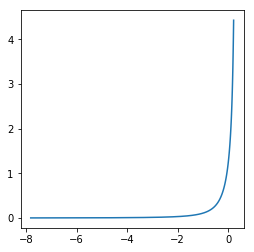

In [2]:
y = np.linspace(0.01,0.99,100, endpoint=True) 

mu = 0
sigma = 0.5
xi = -0.947
epsilon =  0.082

plt.figure(3, figsize=(4, 4))
plt.plot(quantile(y, mu, sigma, xi, epsilon), 1 / quantile_density(y, sigma, xi, epsilon))
plt.show()

In [3]:
%timeit quantile(y, mu, sigma, xi, epsilon)
%timeit quantile_density(y, sigma, xi, epsilon)

The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 27.1 µs per loop
10000 loops, best of 3: 44 µs per loop


In [4]:
class GldCsw:   
    def alpha(epsilon):
        return 0.5 * ( (0.5 - epsilon)/ (np.sqrt(epsilon * (1-epsilon)) ) )
    
    def beta(xi):
        return 0.5 * ( xi / np.sqrt(1 -  np.power(xi, 2)) )
    
    def S(u, xi, epsilon):        
        alpha = GldCsw.alpha(epsilon)
        beta = GldCsw.beta(xi)
        if xi == 0 and epsilon == 0.5:
            return np.log(u) - np.log(1-u)
        if xi != 0 and epsilon == 0.5 *(1+xi):
            return ln(u) - (1/(2*alpha)) * (np.power(1-u, 2 * alpha) - 1)
        if xi != 0 and epsilon == 0.5 *(1-xi):
            return (1/(2*beta))*(np.power(u, 2*beta) - 1) - np.log(1 - u)
        return (1 / (alpha + beta)) * (np.power(u, alpha+beta) - 1) - (1 / (alpha - beta))*(np.power(1- u, alpha-beta) - 1)

    def Q(u, mu, sigma, xi, epsilon):
        S = GldCsw.S
        return mu + sigma * ((S(u, xi, epsilon) - S(1/2, xi, epsilon))) / (S(3/4, xi, epsilon) - S(1/4, xi, epsilon))

    def q(u, sigma, xi, epsilon):
        S = GldCsw.S
        alpha = GldCsw.alpha(epsilon)
        beta = GldCsw.beta(xi)
        d_du = np.power(u, alpha + beta - 1) + np.power(1 - u, alpha-beta-1)
        return d_du * sigma / (S(.75, xi, epsilon) - S(.25, xi, epsilon)) 

In [5]:
%timeit GldCsw.Q(y, mu, sigma, xi, epsilon)
%timeit GldCsw.q(y, sigma, xi, epsilon)

The slowest run took 34.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 68 µs per loop
10000 loops, best of 3: 48.3 µs per loop
